# **Introduction**
In this kernel I will go through detailed explanation of CNN Model. This notebook will work as a perfect tutorial for beginers who are working first time with the CNN. I will start with preparing the data so that we can use it for our model. Then coming to the model part, I will explain each layer of the model so that you know the insights of what each layer is actually doing. Then we will talk about optimizers, callback techniques and data augmentation technique in detail. Finally we will evalaute our model and check how our model is working.<br>

## What is CNN?
Convolutional Neural Network(CNN) are powerful image processing, artificial intelligence (AI) that use deep learning to perform both generative and descriptive tasks, often using machine vison that includes image and video recognition, along with recommender systems and natural language processing (NLP). A CNN uses a system much like a multilayer perceptron that has been designed for reduced processing requirements. The layers of a CNN consist of an input layer, an output layer and a hidden layer that includes multiple convolutional layers, pooling layers, fully connected layers and normalization layers. The removal of limitations and increase in efficiency for image processing results in a system that is far more effective, simpler to trains limited for image processing and natural language processing.

# **Table of Contents**
<ul style="list-style-type: square;">
    <li><a href='#1'>Importing Libraries</a></li>
    <li><a href='#2'>Reading the data</a></li>
    <li><a href='#3'>Data Preparation</a></li>
    <ul>
        <li><a href='#6'>Visualization</a></li>
        <li><a href='#7'>Normalization</a></li>
        <li><a href='#8'>Reshaping</a></li>
        <li><a href='#9'>Encoding</a></li>
        <li><a href='#10'>Splitting the data</a></li>
    </ul>
    <li><a href='#4'>CNN Model</a></li>
    <ul>
        <li><a href='#11'>Explanation of layers</a></li>
        <li><a href='#12'>Optimizer</a></li>
        <li><a href='#13'>Callback Technique</a></li>
        <li><a href='#14'>Data Augmentation</a></li>
        <li><a href='#15'>Training our model</a></li>
        <li><a href='#16'>Evaluating our model</a></li>
    </ul>
    <li><a href='#5'>Prediction on Test Set</a></li>
</ul>

<a id = '1'></a>
# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils import plot_model
from IPython.display import Image
from keras.utils.np_utils import to_categorical

<a id='2'></a>
# **Reading the data**

In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [3]:
df1.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id='3'></a>
# **Data Preparation**

In [4]:
Y_train = df1["label"]
X_train = df1.drop(labels = ["label"],axis = 1).values 

<a id='6'></a>
### Plotting first six training images

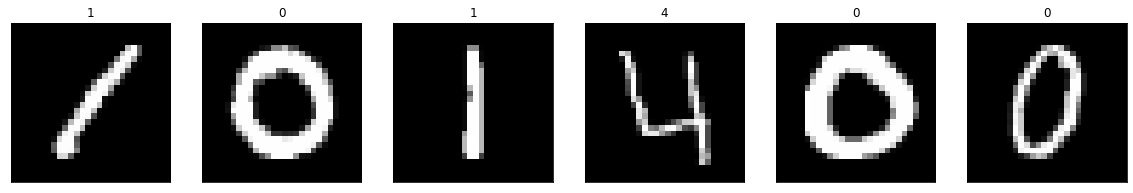

In [5]:
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28,28), cmap='gray')
    ax.set_title(str(Y_train[i]))

### Let us visualize how are images stored in matrix form

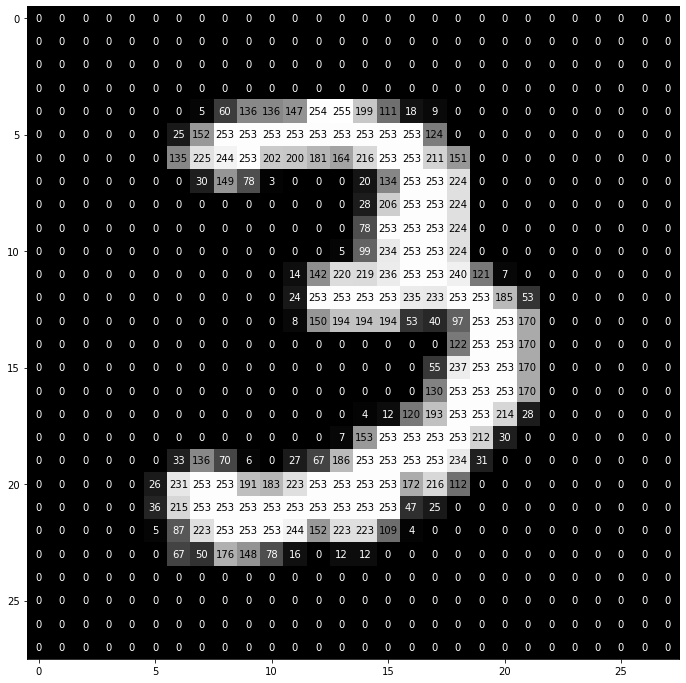

In [6]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[9].reshape(28,28), ax)

### Let us see how many each digits are present

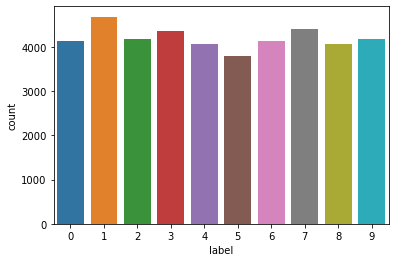

In [7]:
g = sns.countplot(Y_train)

<a id='7'></a>
## Normalization
To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to normalize our dataset, meaning divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

In [8]:
X_train = X_train/255.0
X_test = df2/255.0

<a id='8'></a>
## Reshaping our data

In [9]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

<a id='9'></a>
## Encoding the Label column
Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors using the to_categorical function from the keras.<br> (eg:- 5 -> [0,0,0,0,0,1,0,0,0,0]).

In [10]:
Y_train = to_categorical(Y_train, num_classes = 10)

<a id='10'></a>
Let's split our data into training and validation set and we are going to use the train_test_split function of sklearn library for this step.

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=7)

<a id='4'></a>
# **CNN Model**

<a id='11'></a>
#### Now we come to the most important part of our notebook.

Firstly, we will define our model to be a Sequential model.
Then we add our first layer i.e. a convolutional(Conv2D) layer. So what does a convolutional layer perform?
- Takes an input volume 
- Applies a filter at every position of the input
- Outputs another volume (usually of different size)

## **Like this:-** 

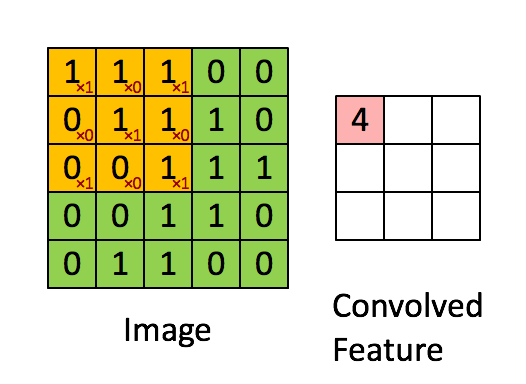
<caption><center> <u> <font color='purple'>Convolution operation<br> with a filter of 3x3 and a stride of 1 (stride = amount you move the window each time you slide)</font></u> </center></caption>

<br>In a computer vision application like this competition, each value in the matrix on the left corresponds to a single pixel value, and we convolve a 3x3 filter with the image by multiplying its values element-wise with the original matrix, then summing them up and adding a bias.

Next we add a BatchNormalization layer. Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.
<br>  
Then again we add a convolutional layer and a batch normalization layer. After that we add a pooling layer. Here we are adding a MaxPool2D layer.The pooling (POOL) layer reduces the height and width of the input. It helps reduce computation, as well as helps make feature detectors more invariant to its position in the input.
<br>(Max-pooling layer: slides an (f,f) window over the input and stores the max value of the window in the output.)
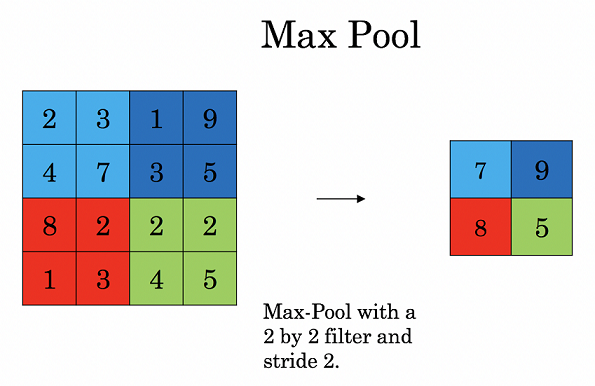
<br> Then, we add a Dropout Layer. A Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.<br>

We repeat the whole process one more time. Then we add a Flatten layer. A flatten layer collapses the spatial dimensions of the input into the channel dimension.
<br>    
Lastly, just add two dense layers followed by a batch normalization layer and one dropout layer. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.

In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Let us see the summary of our model. Here we are going to plot the model summary using plot_model.

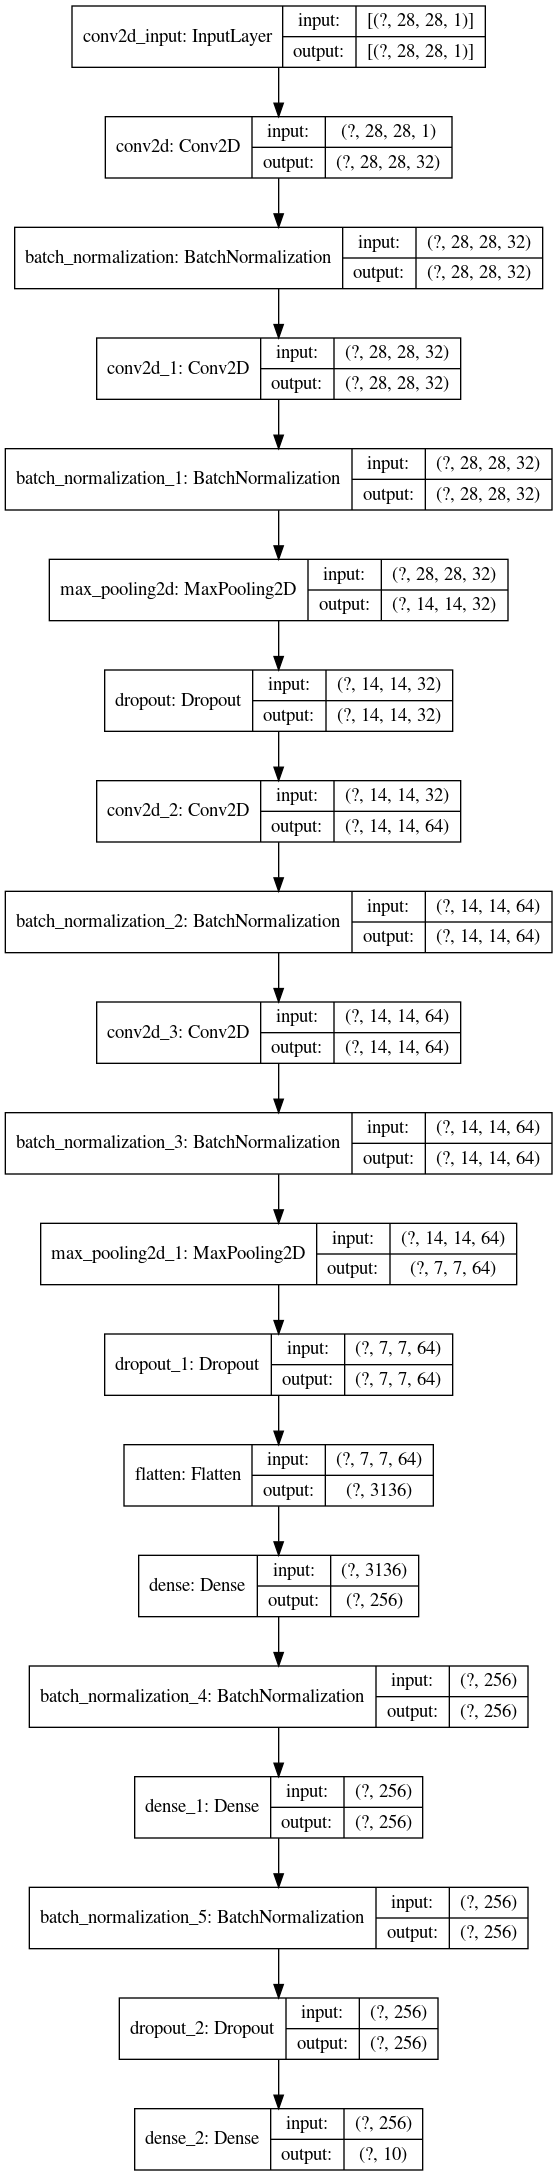

In [13]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image("model.png")

In [14]:
epochs = 30
batch_size = 64

<a id='12'></a>
## Define the optimizer
Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses. Optimization algorithms or strategies are responsible for reducing the losses and to provide the most accurate results possible.
![](https://cs231n.github.io/assets/nn3/opt1.gif)
We have many options for optimizers and I tried many options and RMSprop gave me the best result.
<br>

Then we will compile our model with RMSprop optimizer and categorical_crossentropy as loss function.

In [15]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [16]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

<a id='13'></a>
## Callback Technique
You define and use a callback when you want to automate some tasks after every training/epoch that help you have controls over the training process. This includes stopping training when you reach a certain accuracy/loss score, saving your model as a checkpoint after each successful epoch, adjusting the learning rates over time, and more.
Here I am using ReduceLRonPlateau technique which reduces learning rate when a metric has stopped improving.

In [17]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

<a id='14'></a>
## Data Augmentation
The performance of deep learning neural networks often improves with the amount of data available.
Many people have downloaded mnist data to increase the model. But a more appropriate way to increase the data is to apply data augmentation technique.

Data augmentation is a technique to artificially create new training data from existing training data. This is done by applying domain-specific techniques to examples from the training data that create new and different training examples.

Image data augmentation is perhaps the most well-known type of data augmentation and involves creating transformed versions of images in the training dataset that belong to the same class as the original image.

Transforms include a range of operations from the field of image manipulation, such as shifts, flips, zooms, and much more.

I am applying data augmentation technique by using ImageDataGenerator function from keras and what I have done is:-

* Randomly rotate some training images by 10 degrees
* Randomly zoom by 10% 
* Randomly shear by 10%
* Randomly shift images horizontally by 10% of the width
* Randomly shift images vertically by 10% of the height 

In [18]:
image_gen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,horizontal_flip=False,vertical_flip=False,fill_mode='nearest')

In [19]:
train_image_gen=image_gen.fit(X_train)

<a id='15'></a>
### So we have completed all the pre processes. Now its time to train our model.

In [20]:
model.fit_generator(image_gen.flow(X_train, Y_train, batch_size=batch_size), epochs=epochs, validation_data = (X_val, Y_val), callbacks = [learning_rate_reduction])

Epoch 1/30
591/591 [==============================] - 16s 27ms/step - loss: 0.3197 - accuracy: 0.9027 - val_loss: 0.0787 - val_accuracy: 0.9786 - lr: 0.0010
Epoch 2/30
591/591 [==============================] - 16s 27ms/step - loss: 0.1042 - accuracy: 0.9684 - val_loss: 0.0438 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 3/30
591/591 [==============================] - 17s 29ms/step - loss: 0.0785 - accuracy: 0.9764 - val_loss: 0.0380 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 4/30
591/591 [==============================] - 16s 27ms/step - loss: 0.0656 - accuracy: 0.9801 - val_loss: 0.0433 - val_accuracy: 0.9881 - lr: 0.0010
Epoch 5/30
591/591 [==============================] - 17s 28ms/step - loss: 0.0572 - accuracy: 0.9834 - val_loss: 0.0366 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 6/30
591/591 [==============================] - 16s 27ms/step - loss: 0.0516 - accuracy: 0.9844 - val_loss: 0.0405 - val_accuracy: 0.9895 - lr: 0.0010
Epoch 7/30
591/591 [==============================] - 17s 

<a id='16'></a>
## Evaluating our model

In [21]:
metrics=pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy,lr
0,0.319714,0.902672,0.078707,0.978571,0.001000
1,0.104152,0.968413,0.043770,0.987619,0.001000
2,0.078538,0.976429,0.037983,0.988333,0.001000
3,0.065584,0.980106,0.043294,0.988095,0.001000
4,0.057212,0.983413,0.036594,0.990952,0.001000
5,0.051634,0.984418,0.040456,0.989524,0.001000
6,0.047556,0.986058,0.038782,0.991667,0.001000
7,0.049096,0.986243,0.029050,0.992143,0.001000
8,0.043909,0.987143,0.023985,0.992619,0.001000
9,0.042523,0.988175,0.022068,0.993810,0.001000


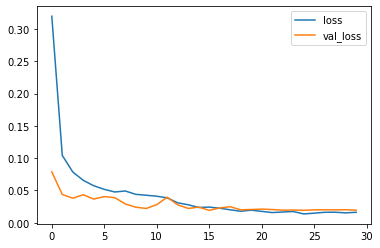

In [22]:
metrics[['loss' , 'val_loss']].plot()
plt.show()

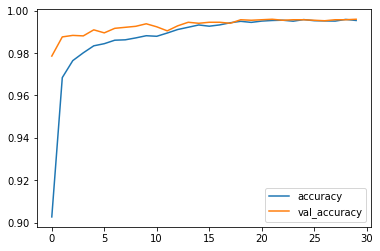

In [23]:
metrics[['accuracy' , 'val_accuracy']].plot()
plt.show()

### Let's see some of our predictions

Prediction:
7


<function matplotlib.pyplot.show(*args, **kw)>

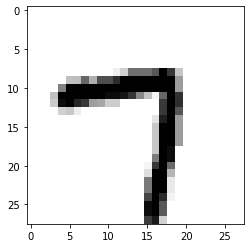

In [24]:
np.random.seed(16)
random_selection=np.random.randint(0,4201,size=1)
random_sample=X_val[random_selection]
print('Prediction:')
print(model.predict_classes(random_sample.reshape(1,28,28,1))[0])
plt.imshow(random_sample.reshape(28,28),cmap='binary')
plt.show

Prediction:
3


<function matplotlib.pyplot.show(*args, **kw)>

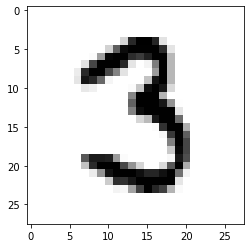

In [25]:
np.random.seed(9)
random_selection=np.random.randint(0,4201,size=1)
random_sample=X_val[random_selection]
print('Prediction:')
print(model.predict_classes(random_sample.reshape(1,28,28,1))[0])
plt.imshow(random_sample.reshape(28,28),cmap='binary')
plt.show

Prediction:
2


<function matplotlib.pyplot.show(*args, **kw)>

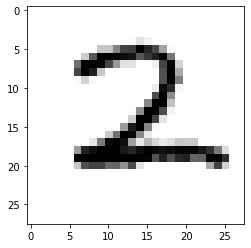

In [26]:
np.random.seed(27)
random_selection=np.random.randint(0,4201,size=1)
random_sample=X_val[random_selection]
print('Prediction:')
print(model.predict_classes(random_sample.reshape(1,28,28,1))[0])
plt.imshow(random_sample.reshape(28,28),cmap='binary')
plt.show

## Confusion Matrix

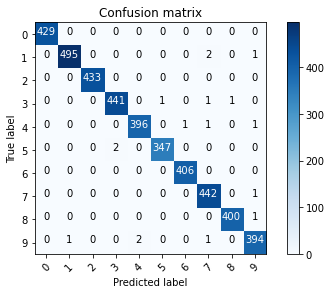

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

<a id='5'></a>
# Prediction on Test Set

In [28]:
results = model.predict(X_test)

In [29]:
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [30]:
predict = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
predict.to_csv("predict.csv",index=False)

### So this is it. I hope I have tried to explain each and every thing.

<h3><font color = "red">Thanks a lot for having a look at this notebook.</font></h3>